Ham or Spam-Gerçek Mesaj veya Reklam/İstenmeyen Mesajı


In [1]:
#pip install wordcloud


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('restaurant.csv')

In [5]:
df.head()

Unnamed: 0               review_id                 user_id  \
0     2370338  _WTGv5XnA-qb_XD1D7Z0jg  6PgdGb3HrZdsfl2GiULo8w   
1     2370357  JlNnsvMPLK_1-X2hwzK24w  IS9yw8P2uAPBX6FNLLX4KA   
2     2370373  hBkoWffORRb6aqKhC_Li2A  uZdFsE_aHbFBChgN6Xa8tw   
3     2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
4     2370500  5tw_pedoHVi9bgeiBNsISg  E0sm4Ve7ifanFYeQMcV8Eg   

              business_id  stars  useful  funny  cool  \
0  RESDUcs7fIiihp38-d6_6g      5       0      1     0   
1  RESDUcs7fIiihp38-d6_6g      4      39     21    29   
2  RESDUcs7fIiihp38-d6_6g      4       1      1     1   
3  RESDUcs7fIiihp38-d6_6g      1       0      0     0   
4  RESDUcs7fIiihp38-d6_6g      5       0      0     0   

                                                text                 date  
0  After getting food poisoning at the Palms hote...  2012-12-04 03:10:18  
1  "A feast worthy of Gods"\n\nBaccarnal Buffet i...  2014-01-17 00:50:50  
2  The crab legs are better than the ones at Wick...  2015-06-08 18:03:09  
3  Not worth it! Too salty food and expensive! Th...  2016-12-19 16:15:29  
4  I would give this infinite stars if I could. M...  2015-07-28 07:13:17

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [7]:
df.shape

(10417, 10)

In [6]:
#df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
#df=df[['v1','v2']]

In [8]:
df.text[0]

"After getting food poisoning at the Palms hotel, I was scared to eat at any more buffets. But we figured with the high price tag, the positive reviews etc, it was worth a chance. I'm really glad we gave it a try. (btw I uploaded a collage of the things we ate)\n\nThe seafood line is by the far the longest, i would not recommend showing up in heels if you're female, my feet were killing me between the line at the door, the line to get sat, and the seafood line. Totally worth it though.\n\nThe prime rib was the best Ive ever had.\n\nI loved the sweet potato tots.\n\nI even have PHO!\n\nThe music was great and so was our server Alma, ( he was a older gentleman with a mustache and was very attentive and delightful).\n\nI will return next trip in more comfortable shoes. After a horrible visit at the palms with non stop issues in a matter of 48 hours, your establishment was truly the high light of our trip. Thank you for an exquisite dinner."

In [9]:
df[df.stars==1]

Unnamed: 0               review_id                 user_id  \
3         2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
12        2371349  7aYfSp52nU6UbZbeRZ2c-g  ic-tyi1jElL_umxZVh8KNA   
33        2372856  nK4OlgQ11QMZ_pMgeE9BzA  QPKF4JnGJrYKnC9gzwEc-w   
45        2373128  qFkvCcTNWcQdLH6ORXIqVQ  qr06IGEdVEIQmyv-NZe-og   
50        2373371  unLD4_m1PgtqBA1YRcp4Dw  x7Uhf587a2Mp6biY8CttpQ   
...           ...                     ...                     ...   
10367     3215644  u3vSoPgFzsmS6o1TpHntCQ  b40IB7VrUOU2HxUIxp7eHg   
10377     3216328  zOct2Aq30MLfU17BsWLN4g  H9GSPcxChDaNhUmLo5R1uQ   
10390     3218131  Pxsbi9SQJ88tkTYC7PMZBw  2kK-moaKz0LXhj-ouoXvCQ   
10394     3218578  BlQVXfNOt9v0qPBFK7lzHA  _8EjO0bnfAxIGONC7UxccA   
10410     3219849  LbMPx0u9mAcaVDOYiiArsQ  0wNZkuUFDnMA_8YP_PE3Zw   

                  business_id  stars  useful  funny  cool  \
3      RESDUcs7fIiihp38-d6_6g      1       0      0     0   
12     RESDUcs7fIiihp38-d6_6g      1       0      0     0   
33     RESDUcs7fIiihp38-d6_6g      1       0      0     0   
45     RESDUcs7fIiihp38-d6_6g      1       3      0     0   
50     RESDUcs7fIiihp38-d6_6g      1       0      0     0   
...                       ...    ...     ...    ...   ...   
10367  RESDUcs7fIiihp38-d6_6g      1       0      0     0   
10377  RESDUcs7fIiihp38-d6_6g      1       1      1     0   
10390  RESDUcs7fIiihp38-d6_6g      1       0      0     0   
10394  RESDUcs7fIiihp38-d6_6g      1       0      0     0   
10410  RESDUcs7fIiihp38-d6_6g      1       0      0     0   

                                                    text                 date  
3      Not worth it! Too salty food and expensive! Th...  2016-12-19 16:15:29  
12     Food is fine, better than most buffets. \nWhen...  2015-07-16 07:53:22  
33     Be careful using the restroom here. While I wa...  2017-10-24 19:57:44  
45     This buffet can be summarized in 3 words: QUAN...  2017-09-09 00:36:35  
50     This place used to be the best buffet I ever h...  2015-02-16 08:13:39  
...                                                  ...                  ...  
10367  We are locals in Vegas and we never hesitate t...  2019-12-01 21:35:51  
10377  If you want to wait multiple hours for horribl...  2019-12-01 19:30:56  
10390  I  have eaten here for the breakfast and lunch...  2019-12-11 21:10:54  
10394  In thanksgiving day I stayed in line for three...  2019-11-30 05:30:27  
10410  Came him from LA! Thanksgiving Week. We decide...  2019-12-05 18:01:49  

[1056 rows x 10 columns]

In [10]:
df['text']=df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]', '',regex=True) 
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','',regex=True)

In [11]:
df.text[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [12]:
import seaborn as sns

<Axes: xlabel='stars', ylabel='count'>

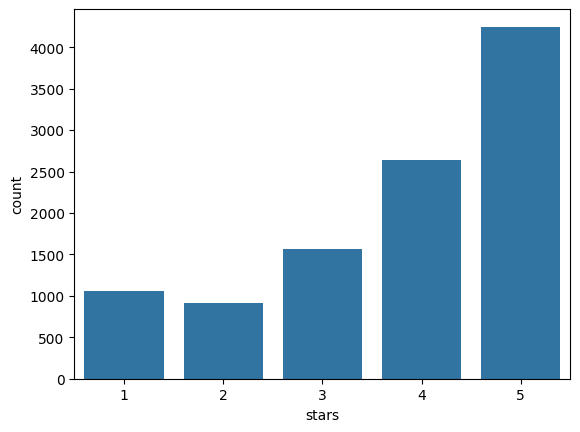

In [13]:
sns.countplot(x=df['stars'])

In [14]:
yelpbw=df[(df.stars==1)|(df.stars==5)]

In [15]:
yelpbw.reset_index(drop=True,inplace=True)

In [16]:
yelpbw.head()

Unnamed: 0               review_id                 user_id  \
0     2370338  _WTGv5XnA-qb_XD1D7Z0jg  6PgdGb3HrZdsfl2GiULo8w   
1     2370411  rbkxvrgZg5kdCL2a66QYmA  8ZWJNAEWsymXDzKx3B0tTQ   
2     2370500  5tw_pedoHVi9bgeiBNsISg  E0sm4Ve7ifanFYeQMcV8Eg   
3     2370586  gmZJrnsIpYIrhPBsaAVjIw  mCHQQxluggGNYOKqpiR94g   
4     2371005  9n4EEhhLlaLDX3QQFVoHMw  or1TN9s4LSRfBF6kmzmb5g   

              business_id  stars  useful  funny  cool  \
0  RESDUcs7fIiihp38-d6_6g      5       0      1     0   
1  RESDUcs7fIiihp38-d6_6g      1       0      0     0   
2  RESDUcs7fIiihp38-d6_6g      5       0      0     0   
3  RESDUcs7fIiihp38-d6_6g      5       0      0     0   
4  RESDUcs7fIiihp38-d6_6g      5       0      0     0   

                                                text                 date  
0  after getting food poisoning at the palms hote...  2012-12-04 03:10:18  
1  not worth it too salty food and expensive this...  2016-12-19 16:15:29  
2  i would give this infinite stars if i could my...  2015-07-28 07:13:17  
3  really enjoyed everything they had to offer it...  2015-04-01 16:18:34  
4  lots of choices good service line wasnt as lon...  2017-03-27 00:42:19

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
from textblob import TextBlob

In [30]:
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [31]:
def lemmafn(text):
    words=TextBlob(text).words
    return[pr.stem(word) for word in words]

In [32]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)

In [33]:
x=yelpbw['text']
y=yelpbw['stars']

In [34]:
x=vect.fit_transform(x)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [36]:
l=LogisticRegression()
d=DecisionTreeClassifier()

In [37]:
l.fit(x_train,y_train)


LogisticRegression()

In [38]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
pred=l.predict(x_test)

In [40]:
pred1=d.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(pred,y_test)

0.9604147031102733

In [43]:
accuracy_score(pred1,y_test)

0.8727615457115928

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
nb=MultinomialNB()

In [46]:
nb.fit(x_train,y_train)

MultinomialNB()

In [47]:
nb.fit(x_train,y_train)

MultinomialNB()

In [48]:
tahmin=nb.predict(x_test)

In [49]:
accuracy_score(tahmin,y_test)

0.9321394910461829

In [50]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np


In [51]:
def wc(data,bgcolor):
  plt.figure(figsize=(10,10))
  mask=np.array(Image.open('cloud.png'))
  wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
  wc.generate(' '.join(data))
  plt.imshow(wc)
  plt.axis('off')


In [53]:
''.join(df['text'])

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinnera feast worthy of godsbaccarnal buffet in caesar palace is consider the best buffet in the las vegas by

In [54]:
import matplotlib.pyplot as plt


In [57]:
ham=df[df['stars']==1]['text']
spam=df[df['stars']==5]['text']


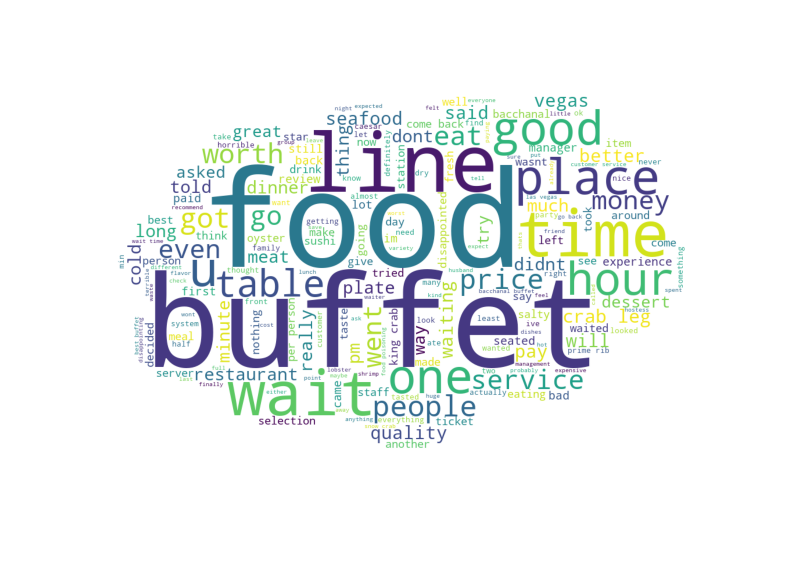

In [58]:
wc(ham,'white')

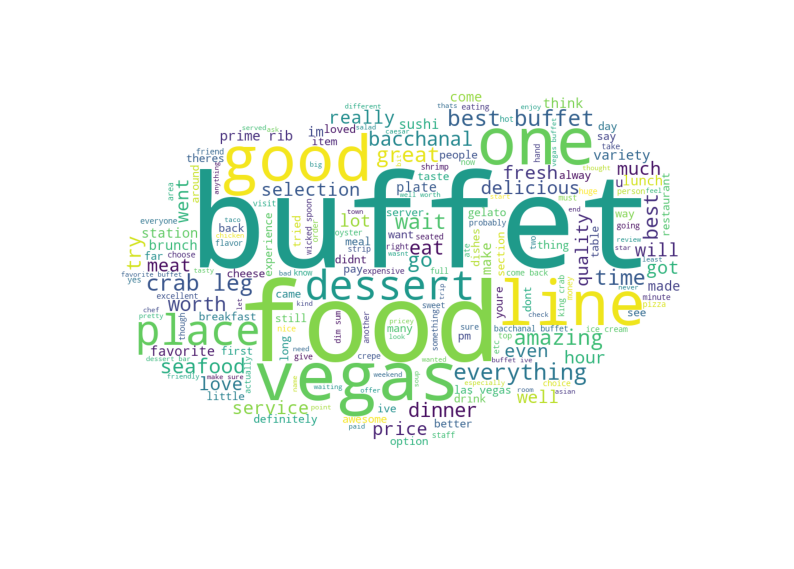

In [60]:
wc(spam,'white')